# Naive Bayesian Classificaiton

In [1]:
# SET UP ENV
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Gaussian Naive Bayes

(array([[ -5.43515573,  -4.80014444],
        [ -5.60098067, -12.92806483],
        [ -0.73121959, -12.88797674],
        [ -0.60342523,  -9.64849071],
        [ -3.37121584,  -6.71576303],
        [ -4.32134532,  -7.70649139],
        [  0.08823081,   0.94005305],
        [  7.05928655,  -8.44990818]]), array([[0.89, 0.11],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.  , 1.  ],
        [0.15, 0.85]]))

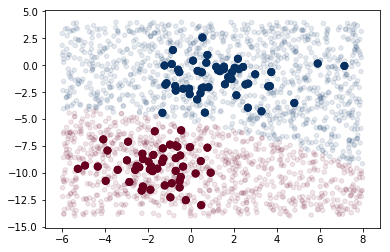

In [22]:
# Example of Data
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# Train the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X, y)
# Let's create some new data to train the model 
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
# plot new data to see where the decision coundries are
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
# I can see also the probability of each pair
yprob = model.predict_proba(Xnew)
Xnew[-8:], yprob[-8:].round(2)
# it would be interesting here to see a graph of those which have <1 probability 


## Multinomial Naive Bayes

In [40]:
# import dataset
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()


AttributeError: head

In [62]:
categories = ['alt.atheism',
              'comp.windows.x',
              'sci.crypt',
              'talk.politics.guns',
              'rec.autos']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='train', categories=categories)


In [80]:
# Build a prediction model 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(92.68,0.5,'test label')

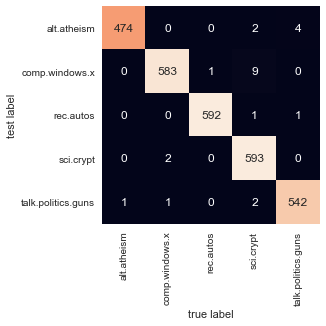

In [85]:
#print the accuracy
sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat, square=True, fmt='d', annot=True, cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('test label')